<a href="https://colab.research.google.com/github/alfianpr/perhitungan-volume-objek-simetri/blob/main/Multiple_Linear_Regression_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Menyiapkan library-library yang digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Menyiapkan dan melihat data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/adiptamartulandi/Multivariate-Linear-Regression/master/kc_house_data.csv', 
                 usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])
print('5 data teratas :')
print(df.head())
print('Jumlah kolom dan baris dari data :', df.shape)
print('informasi data :')
print(df.info())
print('data statistik :')
print(df.describe())

5 data teratas :
      price  bedrooms  bathrooms  sqft_living  grade  yr_built
0  221900.0         3       1.00         1180      7      1955
1  538000.0         3       2.25         2570      7      1951
2  180000.0         2       1.00          770      6      1933
3  604000.0         4       3.00         1960      7      1965
4  510000.0         3       2.00         1680      8      1987
Jumlah kolom dan baris dari data : (21613, 6)
informasi data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB
None
data statistik :
              price    

In [ ]:
#Merubah tipe data dari bathrooms yang semula float menjadi int.
df['bathrooms'] = df['bathrooms'].astype('int')
#Mengganti nilai 33 menjadi 3.
df['bedrooms'] = df['bedrooms'].replace(33,3)

##Cek missing value

In [ ]:
#Mencari dan menangani missing values
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

##Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


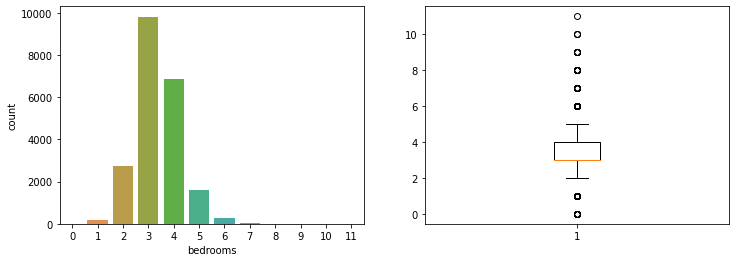

In [ ]:
#Univariate analysis bedrooms

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


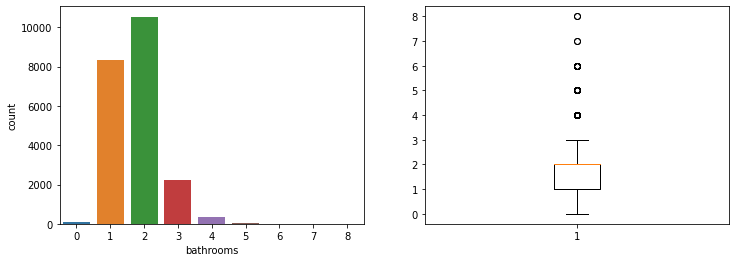

In [ ]:
#Univariate analysis bathrooms.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathrooms'])

plt.show()

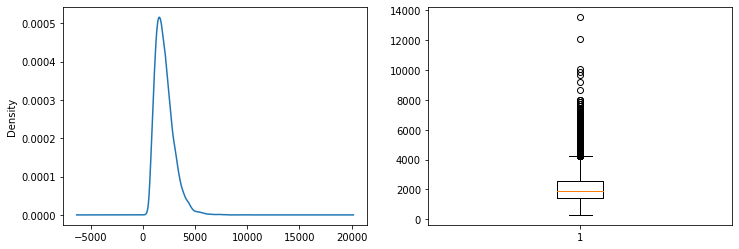

In [ ]:
#Univariate analysis sqft_living.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqft_living'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


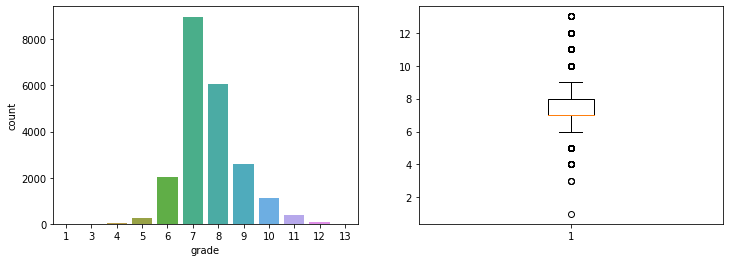

In [ ]:
#Univariate analysis grade.

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

f.add_subplot(1,2,2)
plt.boxplot(df['grade'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


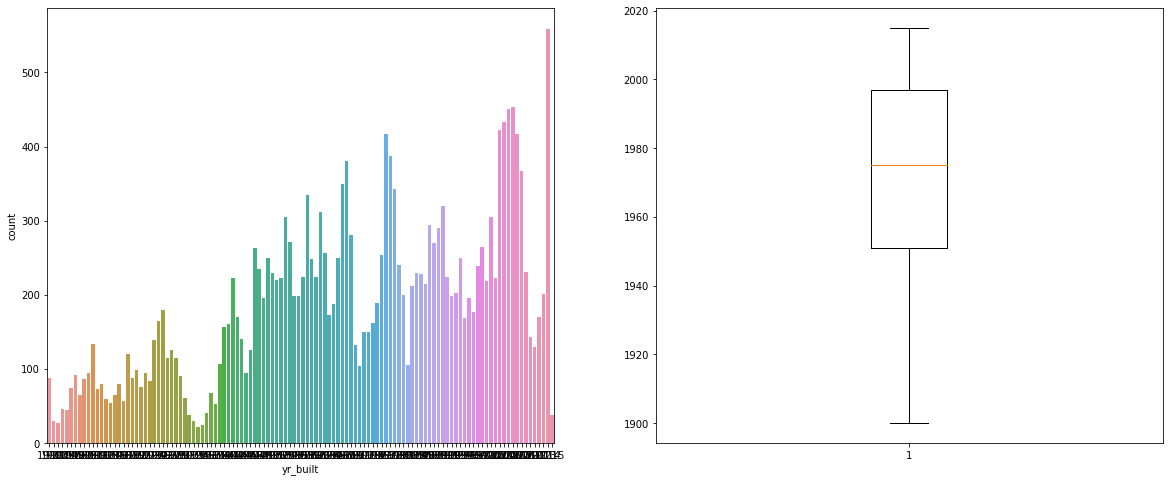

In [ ]:
#Univariate analysis yr_built.

f = plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

f.add_subplot(1,2,2)
plt.boxplot(df['yr_built'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

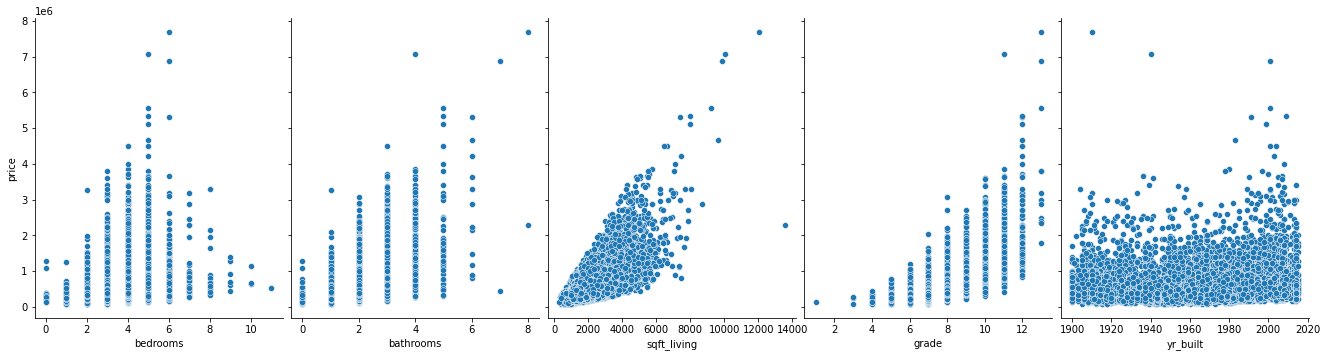

In [ ]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'yr_built'], y_vars=['price'], size=5, aspect=0.75)

In [ ]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.

df.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


##Modelling

In [ ]:
#variabel x dan y.
x = df.drop(columns='price')
y = df['price']

#split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

#object linear regresi.
lin_reg = LinearRegression()

#train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)

#nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790617    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717696


In [ ]:
#Accuracy score dengan data test
lin_reg.score(x_test, y_test)

0.6125113286941101

##Prediksi

In [ ]:
lin_reg.predict([[3,2,1800,7,1990]])

array([361351.99342265])